In [1]:
# Import dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from citipy import citipy

# import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a random set of latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a coordinate list.
coordinates = list(lats_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-43.465084903629325 13.205633125421201
-69.76453319359061 -144.17133108828864
-48.73965503485036 97.09340482270665
46.478028948941045 168.56661051297237
32.91794697461255 154.30547756915337
-4.391069086385258 -88.6237097002539
70.3744938447185 81.12526311365997
33.214844316708096 -149.51429766452316
51.956671518797265 19.101708052935834
-22.1950945720223 105.43988290026704
-70.11377263421738 -70.22954771672379
79.54006475009368 13.955416414992499
69.45291488170042 57.87857759698838
30.449797312455956 7.1339376849097675
85.23393717111193 -88.56370603175328
-25.08924097325962 -8.407610514995326
-21.668973673983345 177.49943264729365
-40.57257706211014 -100.7982200044001
-88.43449080041644 -110.54847228566757
6.7607489581690885 -59.79525712772623
10.522541140132375 92.04564344734968
-3.667685238799379 104.51966231739681
36.23428248719668 -143.05927937556356
-25.90974927774606 91.682061581254
-45.918622231512394 -57.28487024905712
69.95206339339148 0.3323538255165772
77.18449187402737 -131

16.959086276378756 169.23414671286952
-37.06066286574 -76.507779622872
-29.9335523736439 -13.64566373580547
-53.89533556604947 -84.58705683259154
-29.71417228707842 -43.21098384400861
-45.33656535408931 -84.65922746653322
61.63543075601956 72.52711668173919
50.98751168072522 -15.368073481083911
37.8058317281275 89.3828825814939
43.88277693011955 -130.98537032797037
-48.39171243285684 -120.97829980207591
52.282340848262265 -20.38610685675502
44.50450179834013 -68.77171400185685
-38.14182788695426 -175.20263060257363
-70.80570904775755 15.350066648591934
54.109564643133695 52.33831637811596
-41.58810243587935 75.79589710738182
85.15759337753178 -60.01653697448573
-52.160873399814555 -97.03199835051663
-17.49391548734168 -76.21109011218007
15.234944084133105 65.19143220676696
-62.12411131392369 130.99559569291756
-68.108767362235 -37.93477410933531
1.1740670067197243 -94.18574499993282
-57.18150827504258 -68.36819868614539
-34.61683306490593 -117.54640469461914
-4.720089538763304 -7.06897

In [5]:
# Create a list fpr holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficent count
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=57fa3b89900262ba2836b3dad5e6a4ef


In [8]:
# create an empty list to hold the weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")
#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
for lat_lng, city in enumerate(cities):
    # group cities in sets of 50 and rest for 60 seconds for site restrictions
    if (lat_lng % 50 == 0 and lat_lng >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)    
    # create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record and set numbers and the city.
    print(f"Procesing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Procesing Record 1 of Set 1 | hermanus
Procesing Record 2 of Set 1 | mataura
Procesing Record 3 of Set 1 | busselton
Procesing Record 4 of Set 1 | nikolskoye
Procesing Record 5 of Set 1 | nemuro
Procesing Record 6 of Set 1 | san cristobal
Procesing Record 7 of Set 1 | karaul
City not found. Skipping...
Procesing Record 8 of Set 1 | kahului
Procesing Record 9 of Set 1 | leczyca
Procesing Record 10 of Set 1 | carnarvon
Procesing Record 11 of Set 1 | ushuaia
Procesing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Procesing Record 13 of Set 1 | usinsk
Procesing Record 14 of Set 1 | warqla
City not found. Skipping...
Procesing Record 15 of Set 1 | qaanaaq
Procesing Record 16 of Set 1 | jamestown
Procesing Record 17 of Set 1 | isangel
Procesing Record 18 of Set 1 | ancud
Procesing Record 19 of Set 1 | punta arenas
Procesing Record 20 of Set 1 | bartica
Procesing Record 21 of Set 1 | port blair
Procesing Record 22 of Set 1 | prabumulih
Procesing Record 23 of Set 1 | fortuna
Pro

Procesing Record 45 of Set 4 | alofi
Procesing Record 46 of Set 4 | iseyin
Procesing Record 47 of Set 4 | tikapur
Procesing Record 48 of Set 4 | nantucket
Procesing Record 49 of Set 4 | sitka
Procesing Record 50 of Set 4 | ishigaki
Procesing Record 1 of Set 5 | bulgan
Procesing Record 2 of Set 5 | boguchany
Procesing Record 3 of Set 5 | vieira de leiria
Procesing Record 4 of Set 5 | rio gallegos
Procesing Record 5 of Set 5 | pahrump
Procesing Record 6 of Set 5 | avera
Procesing Record 7 of Set 5 | bethel
Procesing Record 8 of Set 5 | linxia
Procesing Record 9 of Set 5 | beira
Procesing Record 10 of Set 5 | la reforma
Procesing Record 11 of Set 5 | quatre cocos
Procesing Record 12 of Set 5 | cap malheureux
Procesing Record 13 of Set 5 | acapulco
Procesing Record 14 of Set 5 | maningrida
Procesing Record 15 of Set 5 | katsuura
Procesing Record 16 of Set 5 | jadu
Procesing Record 17 of Set 5 | lakhna
Procesing Record 18 of Set 5 | roald
Procesing Record 19 of Set 5 | faya
Procesing Record

Procesing Record 43 of Set 8 | jizan
Procesing Record 44 of Set 8 | mandera
Procesing Record 45 of Set 8 | naze
Procesing Record 46 of Set 8 | taonan
Procesing Record 47 of Set 8 | urubamba
Procesing Record 48 of Set 8 | paraiso
Procesing Record 49 of Set 8 | eyl
Procesing Record 50 of Set 8 | anadyr
Procesing Record 1 of Set 9 | kurilsk
Procesing Record 2 of Set 9 | taos
Procesing Record 3 of Set 9 | porto novo
Procesing Record 4 of Set 9 | zhigansk
Procesing Record 5 of Set 9 | mushie
Procesing Record 6 of Set 9 | pisco
Procesing Record 7 of Set 9 | saint-georges
Procesing Record 8 of Set 9 | umm lajj
Procesing Record 9 of Set 9 | halalo
City not found. Skipping...
Procesing Record 10 of Set 9 | ostrovnoy
Procesing Record 11 of Set 9 | kropotkin
Procesing Record 12 of Set 9 | heinola
Procesing Record 13 of Set 9 | pokhara
Procesing Record 14 of Set 9 | cabadiangan
Procesing Record 15 of Set 9 | hoi an
Procesing Record 16 of Set 9 | erzin
Procesing Record 17 of Set 9 | palmer
Procesin

Procesing Record 32 of Set 12 | meyungs
City not found. Skipping...
Procesing Record 33 of Set 12 | samarai
Procesing Record 34 of Set 12 | weligama
Procesing Record 35 of Set 12 | ulladulla
Procesing Record 36 of Set 12 | srandakan
Procesing Record 37 of Set 12 | talnakh
Procesing Record 38 of Set 12 | biggar
Procesing Record 39 of Set 12 | makokou
Procesing Record 40 of Set 12 | nyurba
Procesing Record 41 of Set 12 | tessalit
Procesing Record 42 of Set 12 | pangai
Procesing Record 43 of Set 12 | sussex
Procesing Record 44 of Set 12 | kristiansund
Procesing Record 45 of Set 12 | qasigiannguit
Procesing Record 46 of Set 12 | kalabo
Procesing Record 47 of Set 12 | warmbad
Procesing Record 48 of Set 12 | kathu
Procesing Record 49 of Set 12 | mahina
Procesing Record 50 of Set 12 | tezu
Procesing Record 1 of Set 13 | sao raimundo nonato
Procesing Record 2 of Set 13 | kaka
Procesing Record 3 of Set 13 | cherskiy
Procesing Record 4 of Set 13 | moose factory
Procesing Record 5 of Set 13 | sfa

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,52.81,77,75,10.42,ZA,2022-10-01 21:06:00
1,Mataura,-46.1927,168.8643,47.48,75,21,2.01,NZ,2022-10-01 21:06:01
2,Busselton,-33.6500,115.3333,54.19,84,78,15.77,AU,2022-10-01 21:06:01
3,Nikolskoye,59.7035,30.7861,42.69,94,94,2.44,RU,2022-10-01 21:06:02
4,Nemuro,43.3236,145.5750,59.25,84,52,22.70,JP,2022-10-01 21:06:02
5,San Cristobal,7.7669,-72.2250,74.82,72,41,6.38,VE,2022-10-01 21:04:02
6,Kahului,20.8947,-156.4700,87.82,51,40,19.57,US,2022-10-01 21:06:03
7,Leczyca,52.0596,19.1997,53.15,87,100,11.79,PL,2022-10-01 21:06:04
8,Carnarvon,-24.8667,113.6333,65.59,76,0,16.73,AU,2022-10-01 21:06:04
9,Ushuaia,-54.8000,-68.3000,43.36,64,18,3.58,AR,2022-10-01 21:02:22


In [11]:
#reorder columns in data frame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-10-01 21:06:00,-34.4187,19.2345,52.81,77,75,10.42
1,Mataura,NZ,2022-10-01 21:06:01,-46.1927,168.8643,47.48,75,21,2.01
2,Busselton,AU,2022-10-01 21:06:01,-33.6500,115.3333,54.19,84,78,15.77
3,Nikolskoye,RU,2022-10-01 21:06:02,59.7035,30.7861,42.69,94,94,2.44
4,Nemuro,JP,2022-10-01 21:06:02,43.3236,145.5750,59.25,84,52,22.70
5,San Cristobal,VE,2022-10-01 21:04:02,7.7669,-72.2250,74.82,72,41,6.38
6,Kahului,US,2022-10-01 21:06:03,20.8947,-156.4700,87.82,51,40,19.57
7,Leczyca,PL,2022-10-01 21:06:04,52.0596,19.1997,53.15,87,100,11.79
8,Carnarvon,AU,2022-10-01 21:06:04,-24.8667,113.6333,65.59,76,0,16.73
9,Ushuaia,AR,2022-10-01 21:02:22,-54.8000,-68.3000,43.36,64,18,3.58


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

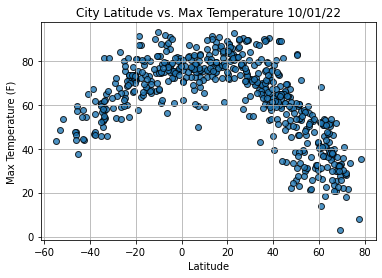

In [16]:
# Import time module
import time

#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

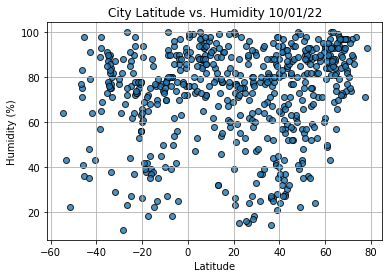

In [17]:
#Build the scatter plot for latitude vs. Humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

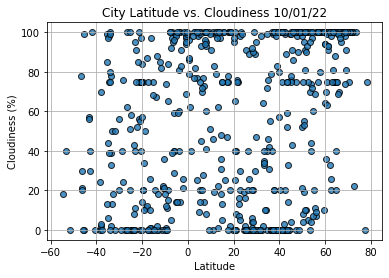

In [19]:
#Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

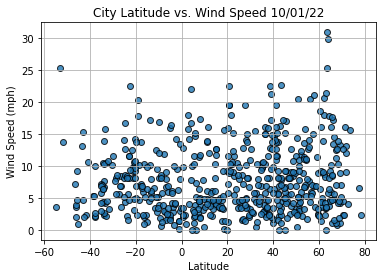

In [20]:
#Build the scatter plot for latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()